## Title :
Exercise: Decision Boundaries

## Description :
In this exercise we will be comparing the classification boundaries we receive from regularized and unregularized logistic regression models.

Don't forget the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">LogisticRegression</a> documentation.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [ ]:
heart = pd.read_csv('./data_heart/Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

heart.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [3]:
# split train and test data
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)

Fit an unregularized logistic regression model (`logit1`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'` and `max_iter = 5000`).  Print out the coefficient estimates, and interpret general trends.

In [5]:
### edTest(test_logit1) ###

degree = 1
predictors = ['Age','MaxHR']

X_train1 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])
y_train = heart_train['AHD']

logit1 = LogisticRegression(C=100000, max_iter = 1000, random_state=5).fit(X_train1, y_train)

print("Logistic Regression Estimated Betas:",
      logit1.intercept_,logit1.coef_)


Logistic Regression Estimated Betas: [4.32578029] [[ 0.02585431 -0.03884871]]


In [17]:
X_train1.shape

(212, 2)

Fit an unregularized 4th order polynomial (with interactions) logistic regression model (`logit4`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'` and `max_iter = 5000`).  Print out the coefficient estimates.

In [6]:
degree = 4
predictors = ['Age','MaxHR']

X_train4 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])

logit4 = LogisticRegression(C=100000, max_iter = 1000, random_state=5).fit(X_train4, y_train)

print("Logistic Regression Estimated Betas:",
      logit4.intercept_,logit4.coef_)


Logistic Regression Estimated Betas: [1.54452923e-08] [[ 3.90387960e-07  1.15285950e-06  7.94160414e-06  1.87438425e-05
   5.85401301e-05  1.06745283e-04  4.11132327e-05 -5.25008792e-05
   8.55130636e-06 -9.77305404e-07 -1.05677758e-06  6.72867754e-07
   6.46582972e-09 -2.59190230e-08]]


c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
X_train4.shape

(212, 14)

The code below performs the classification predictions for the model at all values in the range of the two predictors for `logit1`.  Then the predictions and the train dataset are added to a scatterplot in the second code chunk:

In [7]:
n = 100

x1=np.linspace(np.min(heart[['Age']]),np.max(heart[['Age']]),n)
x2=np.linspace(np.min(heart[['MaxHR']]),np.max(heart[['MaxHR']]),n)
x1v, x2v = np.meshgrid(x1, x2)

# To do the predictions and keep the yhats on 2-D (to match the dummy predictor shapes), use this
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = PolynomialFeatures(degree=1,include_bias=False).fit_transform(X)
yhat1 = logit1.predict(X_dummy)

In [ ]:
X_dummy.shape

(10000, 2)

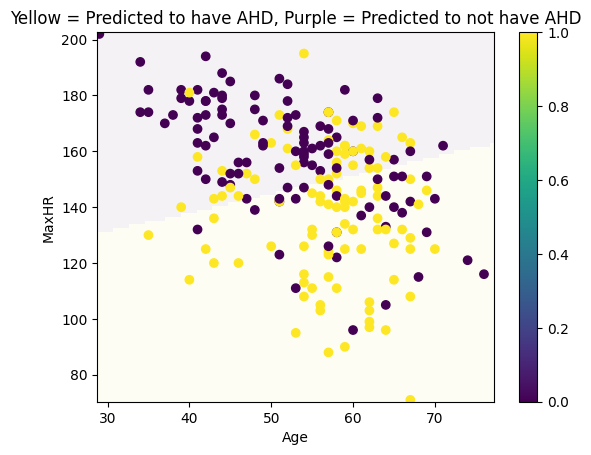

In [8]:
plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

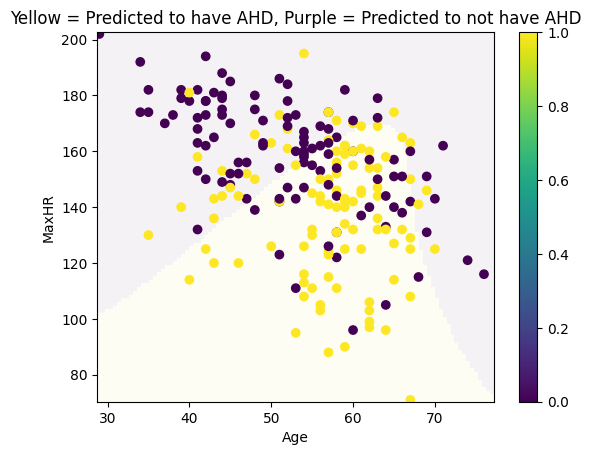

In [9]:
X_dummy = PolynomialFeatures(degree=4,include_bias=False).fit_transform(X)
yhat4 = logit4.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat4.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()


Compare the two models above on how they create the classification boundary.  Which is more likely to be overfit?  How would regularization affect these boundaries?

Fit a ridge-like Logistic Regression model with `C=0.0001` and `max_iter=5000` on the 4th order polynomial as before.  Compare this regularized model with the unregularized one by using the classification boundary.

In [12]:
### edTest(test_ridge) ###

logit_ridge = LogisticRegression(C=0.0001, max_iter=500).fit(X_train4, y_train)


c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


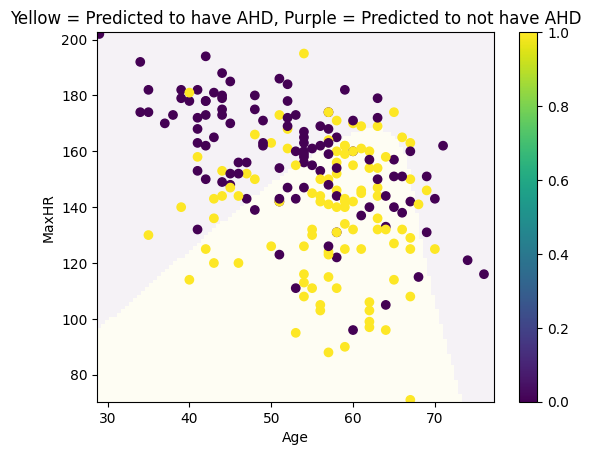

In [13]:
yhat_ridge = logit_ridge.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat_ridge.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

### Perfect Separation
We modify the data to demonstrate perfect separation.

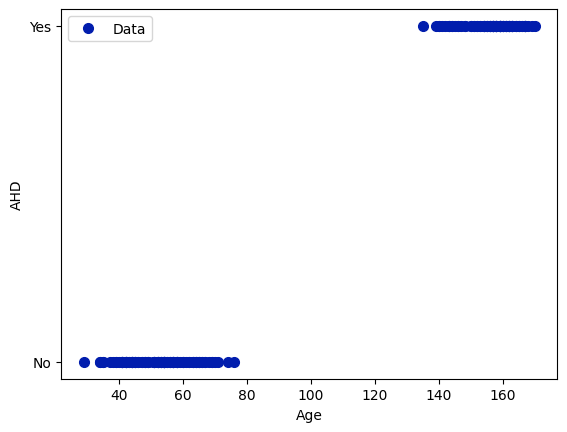

In [14]:
predictors = ['Age','MaxHR']
X_train_new = heart_train[predictors].copy()
X_train_new['Age'] = X_train_new['Age'] + 100*y_train.values


plt.plot(X_train_new['Age'], y_train ,'o', markersize=7,color="#011DAD",label="Data")

plt.xlabel("Age")
plt.ylabel("AHD")
plt.yticks((0,1), labels=('No', 'Yes'))

plt.legend()
plt.show()

In [15]:
# Try to train a logistic regression model

X_train_new = sm.add_constant(X_train_new)

try:
    logreg = sm.Logit(y_train, X_train_new).fit()
except Exception as e: 
    print(e)

         Current function value: 0.000000
         Iterations: 35


c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
